In [1]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data_path = r"C:\Users\A\Desktop\song_recomand_system\data\Music Info.csv"

In [3]:
songs_df = pd.read_csv(data_path,usecols=["track_id", "artist", "name","spotify_preview_url"])
songs_df

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...
...,...,...,...,...
50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...
50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...
50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...
50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...


In [4]:
!pip install dask[dataframe]

In [5]:
import dask.dataframe as dd
user_data_path = r"C:\Users\A\Desktop\song_recomand_system\data\User Listening History.csv"

df = dd.read_csv(user_data_path)

In [6]:
df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [7]:
df

,track_id,user_id,playcount
npartitions=9,,,
,string,string,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


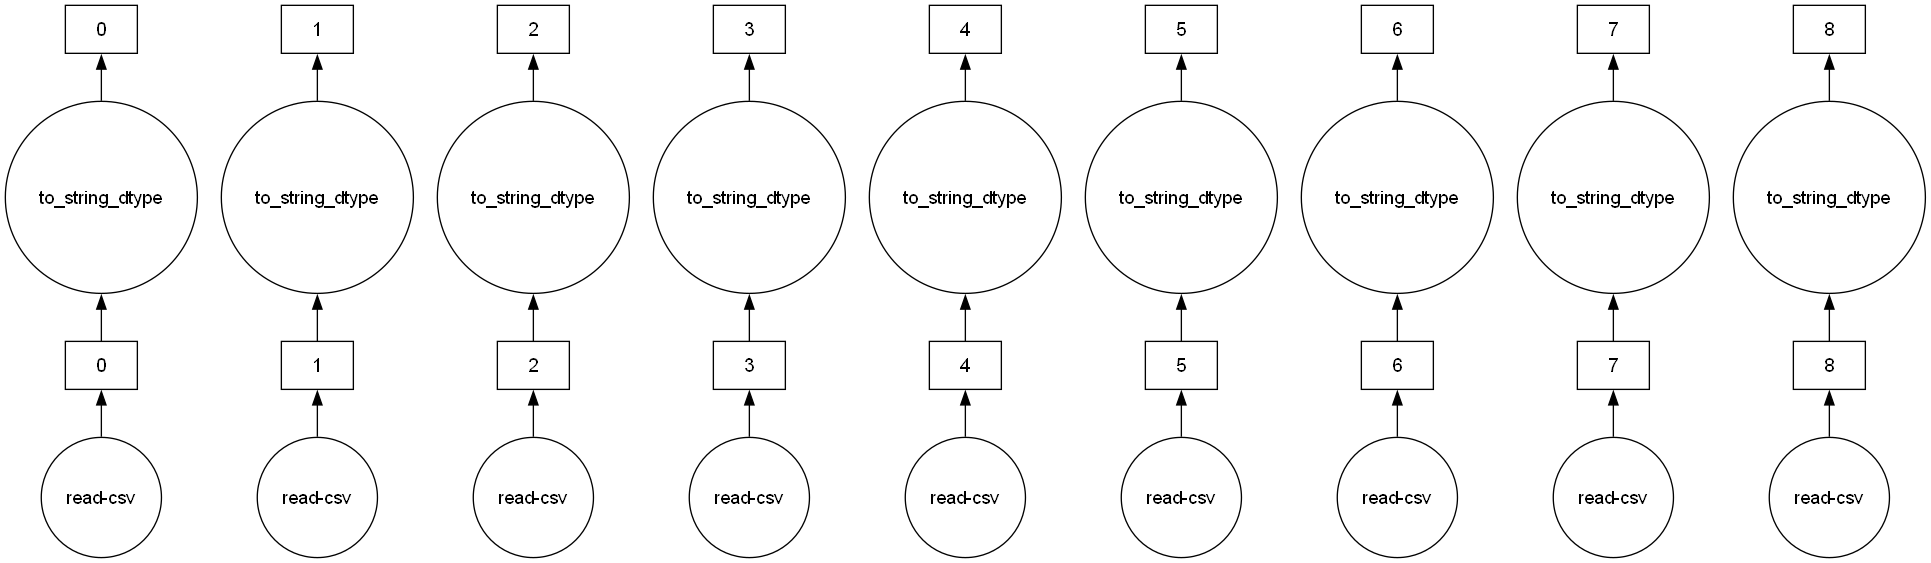

In [8]:
df.visualize(tasks=True)

In [ ]:
unique_tracks = df.loc[:,"track_id"].nunique().compute()
unique_tracks

np.int64(30459)

In [ ]:
unique_users = df.loc[:,"user_id"].nunique().compute()

In [29]:
unique_track_ids = df.loc[:, 'track_id'].unique().compute()

In [30]:
unique_track_ids=unique_track_ids.tolist()

In [31]:
unique_track_ids

['TRLXSNR128F429361D',
 'TRPUGUW128F426BF6F',
 'TRISTWT128F1488FBB',
 'TRKPWGR128E078EE06',
 'TRXQJWK128F146DF76',
 'TRGASNY128F14696B0',
 'TRSQWMI128F932FC8A',
 'TRBVNWT128F93173BA',
 'TRBHQZM128F42A52D2',
 'TRSWJHK128F429EA6F',
 'TRRUZLF128F42396D0',
 'TRMPCGW128F92E0670',
 'TRJNMNC128F427ED16',
 'TRWCIAX128F42925BD',
 'TRGVKBK128F429EA2D',
 'TRGRPEU128F932BD78',
 'TRANEZZ128F92FFC06',
 'TRRYLYK128F92F89F6',
 'TRQGHWL128EF33FB48',
 'TRWZFIC128F933BCA3',
 'TRKSEEY12903CCD312',
 'TRBTCYJ128F92F9586',
 'TRQPRPK12903CCF3B6',
 'TRJSQQT128F149F9B4',
 'TREWPIM128F4261B51',
 'TRMZPXZ128F92F3495',
 'TRTGEVW128F14979BB',
 'TROUMHD128F9355B89',
 'TRKRNZF12903CB52BC',
 'TRBSBCX128F92DEF11',
 'TRXHDTA128F42A077A',
 'TRSJBLT128F429EA02',
 'TRTJYDU128F92E49EE',
 'TRDTMGK12903CC557F',
 'TRBOAJY128F14979B5',
 'TRBYDXV128F424888B',
 'TRCIOVJ128F429EB51',
 'TRYBFNR128F426BE3D',
 'TRWOYHS128F931EB5A',
 'TRNNLYM128F92EDE7F',
 'TRATHTH128F42BC347',
 'TRXERRS128F42969E4',
 'TRZPVLJ128F148D2F7',
 'TRGTVVB12

In [33]:
filtered_songs = songs_df[songs_df['track_id'].isin(unique_track_ids)]
filtered_songs = filtered_songs.reset_index(drop=True) 

In [34]:
filtered_songs

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...
...,...,...,...,...
30454,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...
30455,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...
30456,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...
30457,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...


In [35]:
filtered_songs[filtered_songs["name"]=="Wonderwall"]

,track_id,name,artist,spotify_preview_url
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...


# Interaction matrix

In [42]:
dd.read_csv(user_data_path)

,track_id,user_id,playcount
npartitions=9,,,
,string,string,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [43]:
df = dd.read_csv(user_data_path)
df['playcount'] = df['playcount'].astype(np.float64)
df = df.categorize(columns=['user_id',"track_id"])

user_mapping = df['user_id'].cat.codes
track_mapping = df['track_id'].cat.codes

df = df.assign(user_idx=user_mapping, track_idx=track_mapping)




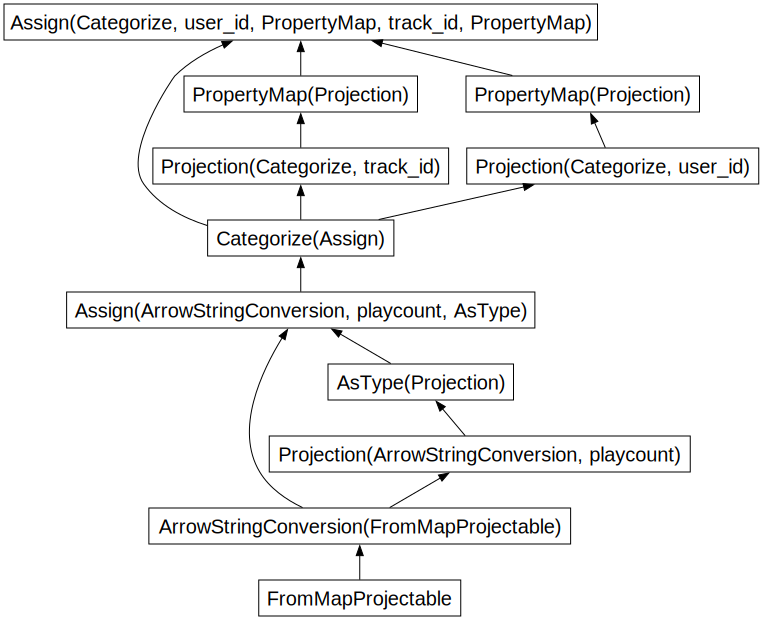

In [40]:
df.visualize()

In [44]:
df

,track_id,user_id,playcount,user_idx,track_idx
npartitions=9,,,,,
,category[known],category[known],float64,int32,int16
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


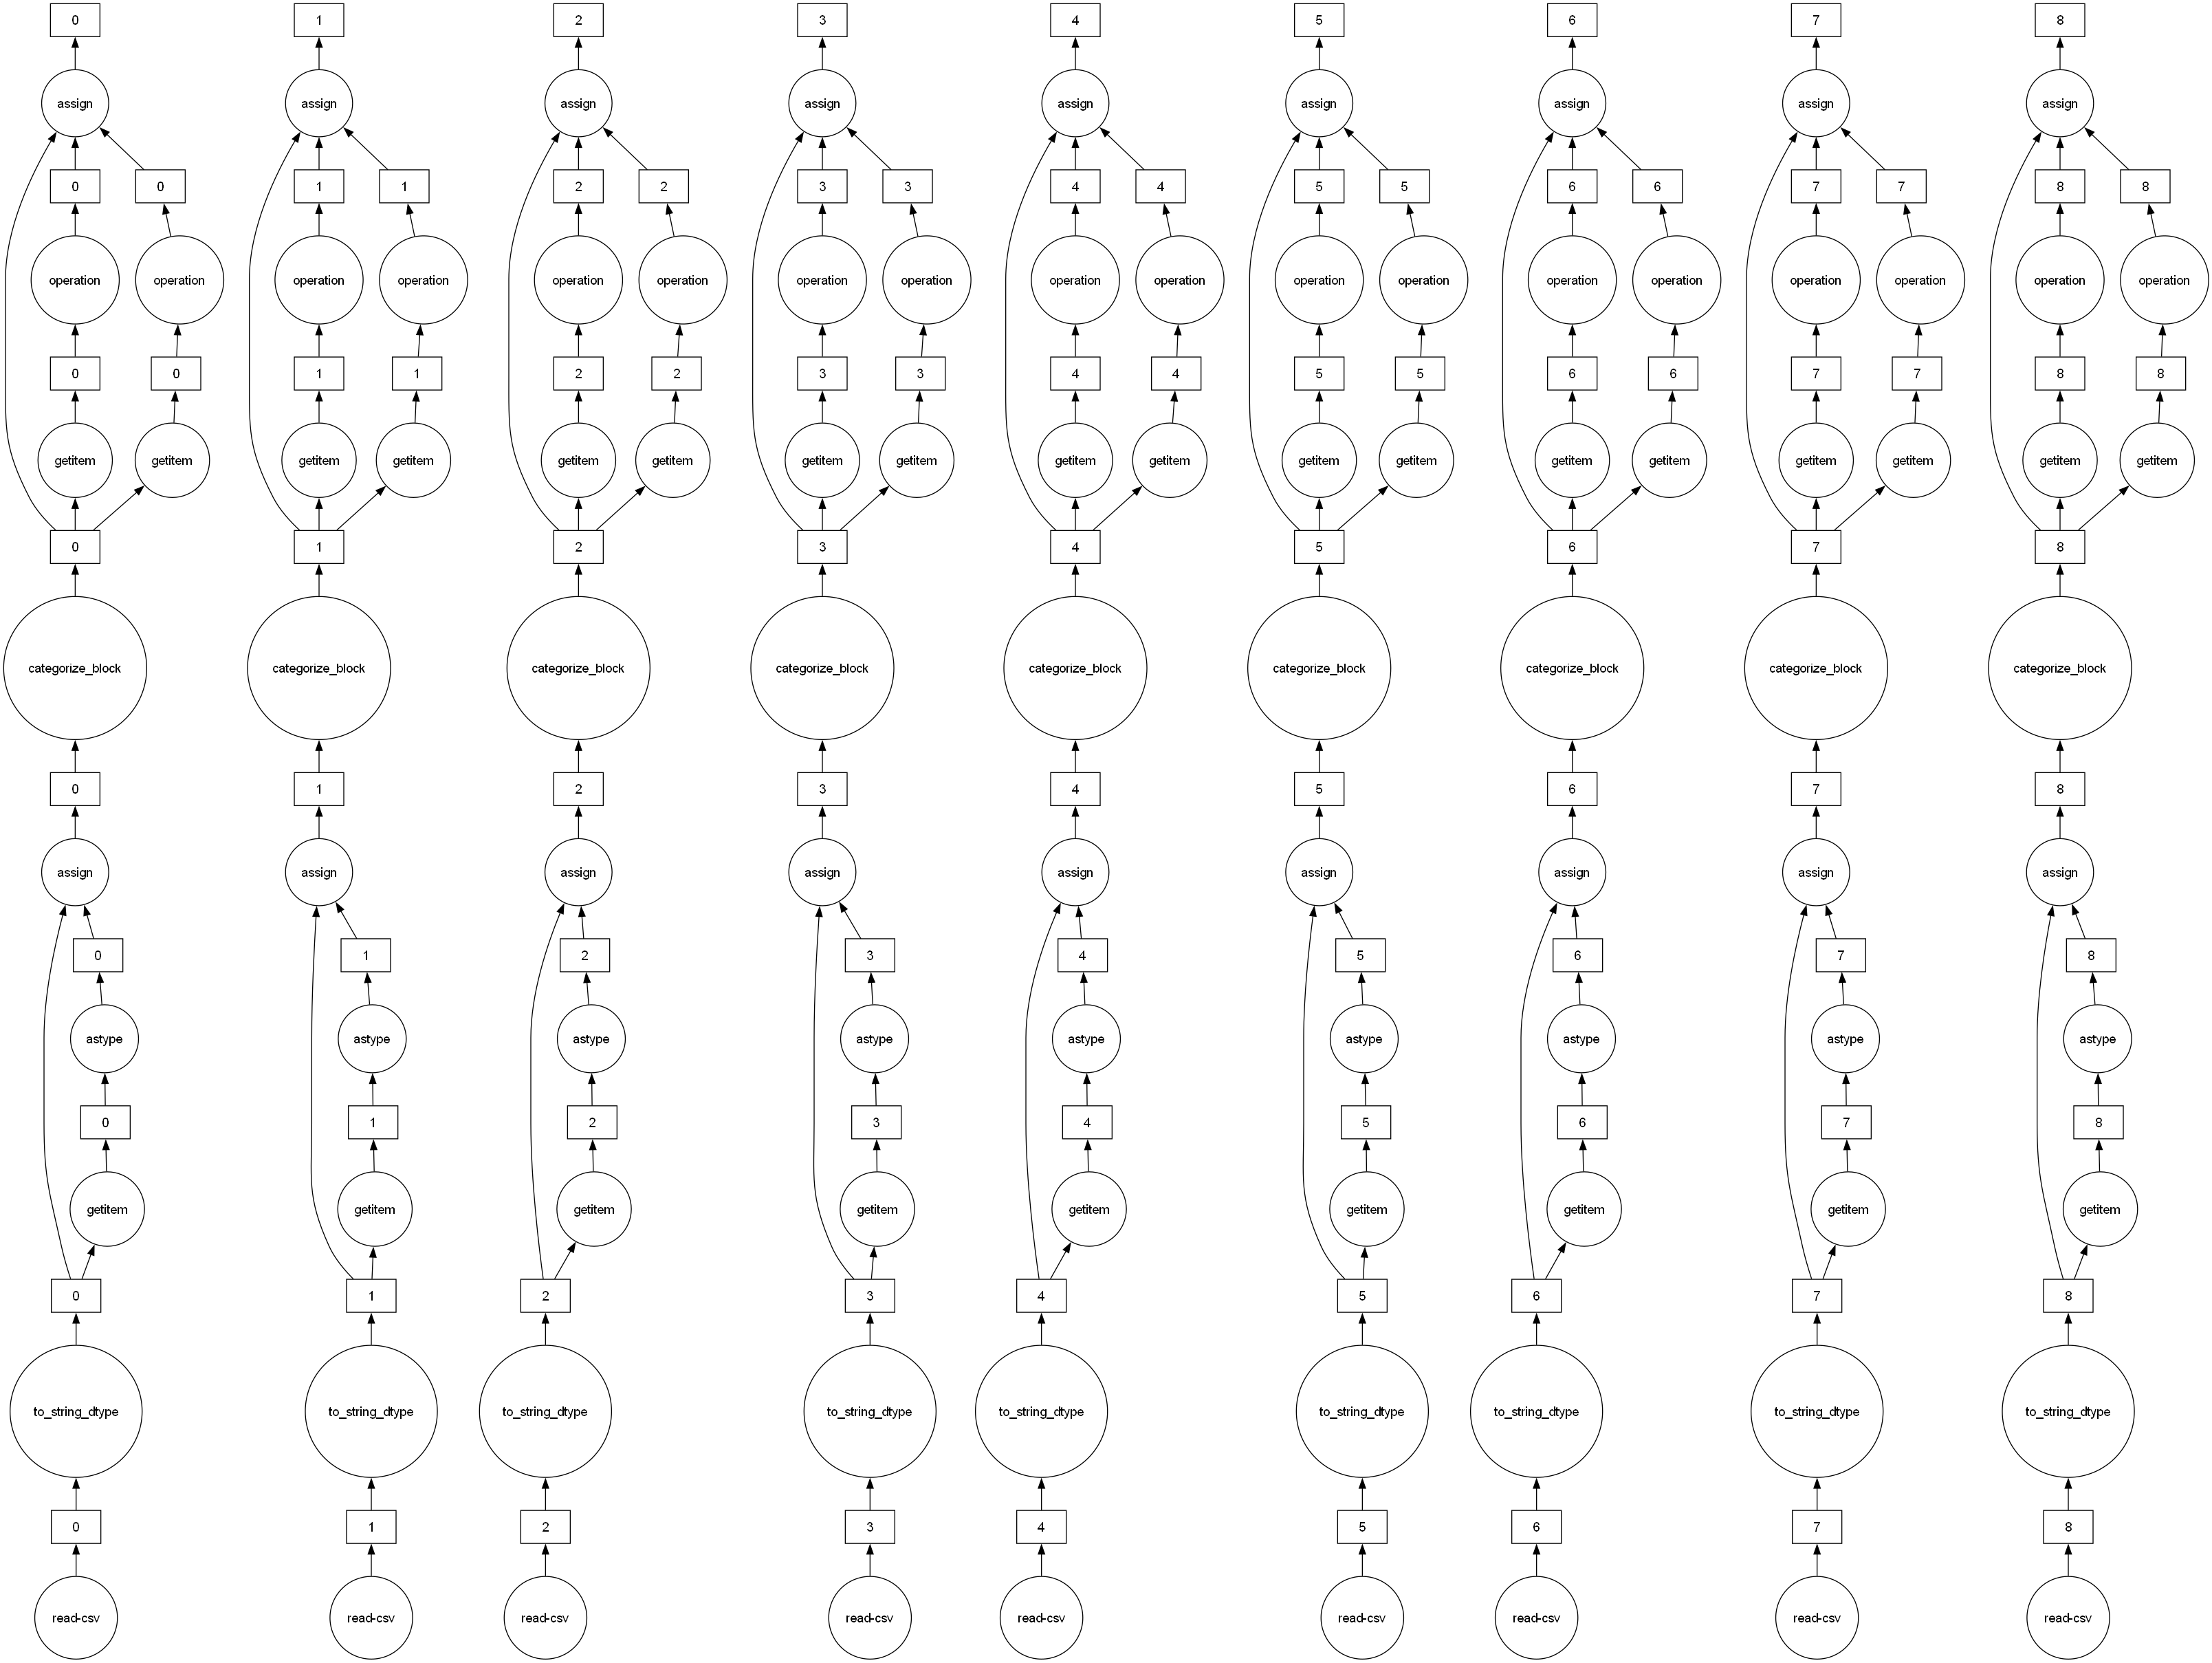

In [45]:
df.visualize(tasks=True)

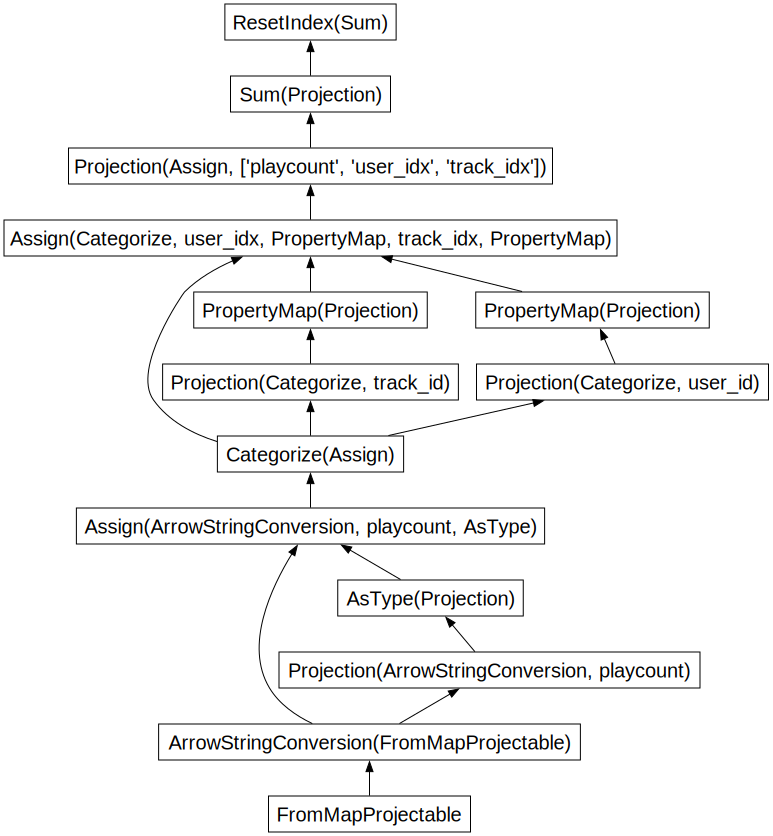

In [46]:
interaction_array = df.groupby(["track_idx","user_idx"])["playcount"].sum().reset_index()
interaction_array.visualize()

In [48]:
interaction_array=interaction_array.compute()

In [49]:
interaction_array

,track_idx,user_idx,playcount
0,0,15780,3.0
1,0,76968,1.0
2,0,134525,2.0
3,0,231541,1.0
4,0,305348,1.0
...,...,...,...
9711296,30458,902360,1.0
9711297,30458,913310,1.0
9711298,30458,922319,1.0
9711299,30458,925779,1.0


In [50]:
row_indices = interaction_array['track_idx']
col_indices = interaction_array['user_idx']
values = interaction_array['playcount']

In [51]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [52]:
n_tracks = unique_tracks
n_users = unique_users

sparse_matrix = csr_matrix((values, (row_indices, col_indices)), shape=(n_tracks, n_users))

In [54]:
sparse_matrix.shape

(30459, 962037)

In [55]:
sparse_matrix.nnz

9711301

In [56]:
row_indices

0              0
1              0
2              0
3              0
4              0
           ...  
9711296    30458
9711297    30458
9711298    30458
9711299    30458
9711300    30458
Name: track_idx, Length: 9711301, dtype: int16

In [58]:
ind=17018

In [59]:
input_array=sparse_matrix[ind]

input_array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 610 stored elements and shape (1, 962037)>

In [60]:
similarity_scores=cosine_similarity(input_array,sparse_matrix)

In [61]:
np.sort(similarity_scores)[-6:][::-1]

array([[0.        , 0.        , 0.        , ..., 0.07217127, 0.08225488,
        1.        ]], shape=(1, 30459))

In [62]:
similarity_scores.shape

(1, 30459)

In [64]:
np.argsort(similarity_scores.ravel())[-6:-1][::-1]

array([24529, 28964,  3620,  9470,  7882])

In [65]:
recommendations=df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-6:-1][::-1]]

In [66]:
recommendations

Index(['TRURCEI12903CA4395', 'TRYLWIW12903CA438D', 'TRCVMAF12903D00E61',
       'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26'],
      dtype='string', name='track_id')

In [68]:
filtered_songs[filtered_songs["name"]=="Crazy in Love"]

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...


In [69]:
filtered_songs[filtered_songs["track_id"].isin(recommendations)]

,track_id,name,artist,spotify_preview_url
8871,TRCVMAF12903D00E61,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
17287,TRGEUXY128F4226B26,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
26611,TRYLWIW12903CA438D,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
26701,TRURCEI12903CA4395,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
27774,TRHRNEE12903CFDBD4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...


In [81]:
def collaborative_recommendation(song_name,user_data,songs_data,interaction_matrix,k=5):
    song_row=songs_data[songs_data["name"]==song_name]
    print(song_row)

    input_track_id=song_row['track_id'].values.item()
    print(input_track_id)

    ind=np.where(user_data['track_id'].cat.categories==input_track_id)[0].item()
    print(ind)

    input_array=interaction_matrix[ind]

    similarity_scores=cosine_similarity(input_array,interaction_matrix)

    recommendation_track_ids=df["track_id"].cat.categories[np.argsort(similarity_scores.ravel())[-k-1:-1][::-1]]
    print(recommendation_track_ids)

    top_scores=np.sort(similarity_scores.ravel())[-k-1:-1][::-1]
    temp_df=pd.DataFrame({"track_id":recommendation_track_ids.tolist(),
                          "score":top_scores})
    print(temp_df)
    
    top_k_songs=(
        songs_data
        .loc[songs_data["track_id"].isin(recommendation_track_ids)]
        .merge(temp_df,on="track_id")
        .sort_values(by="score",ascending=False)
        .drop(columns=['track_id',"score"])
        .reset_index(drop=True)
    )
    return top_k_songs


In [82]:
collaborative_recommendation(song_name="Crazy in Love",
                             user_data=df,
                             songs_data=filtered_songs,
                             interaction_matrix=sparse_matrix)

                track_id           name   artist  \
3337  TROINZB128F932F740  Crazy in Love  Beyoncé   

                                    spotify_preview_url  
3337  https://p.scdn.co/mp3-preview/807828ea7070bda7...  
TROINZB128F932F740
17018
Index(['TRURCEI12903CA4395', 'TRYLWIW12903CA438D', 'TRCVMAF12903D00E61',
       'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26'],
      dtype='string', name='track_id')
             track_id     score
0  TRURCEI12903CA4395  0.082255
1  TRYLWIW12903CA438D  0.072171
2  TRCVMAF12903D00E61  0.055920
3  TRHRNEE12903CFDBD4  0.055293
4  TRGEUXY128F4226B26  0.054046


,name,artist,spotify_preview_url
0,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
1,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
2,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
3,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...
4,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
